In [1]:
import pandas as pd


def concat_csv_files(file_list):
    dataframes = []
    for file in file_list:
        df = pd.read_csv(file)
        dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

df = concat_csv_files(["age_tr_ripser_h1h2.csv", "age_tr_ripser_h1h2_2.csv"])


In [2]:
df.to_csv('age_tr_ripser_h1h2.csv')

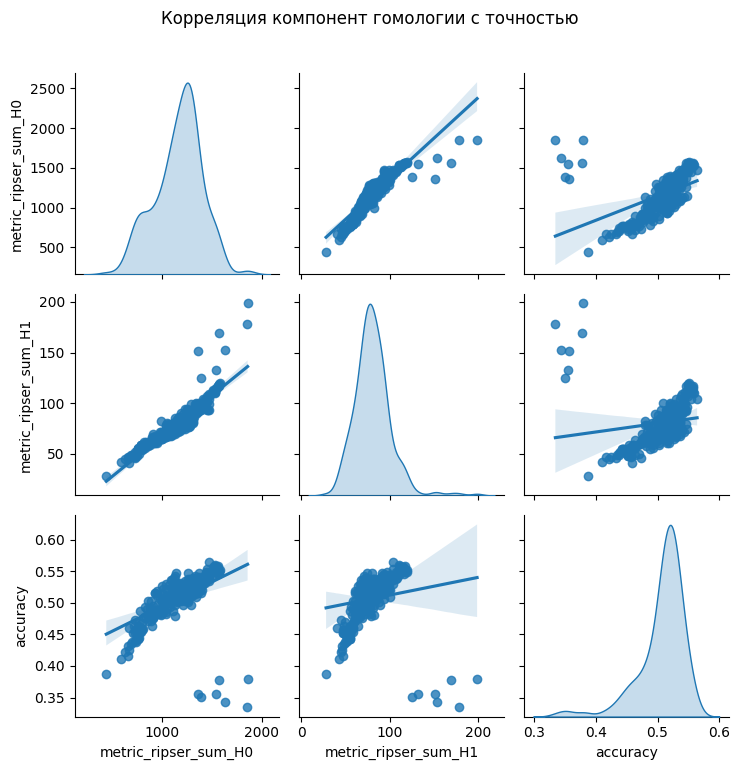

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, vars=["metric_ripser_sum_H0", "metric_ripser_sum_H1", "accuracy"], kind="reg", diag_kind="kde")
plt.suptitle("Корреляция компонент гомологии с точностью", y=1.02)
plt.tight_layout()
plt.show()

In [5]:
print("H0 corr:", df["metric_ripser_sum_H0"].corr(df["accuracy"]))
print("H1 corr:", df["metric_ripser_sum_H1"].corr(df["accuracy"]))

H0 corr: 0.48703225662284916
H1 corr: 0.1548704361766102


In [6]:
df["metric_ripser_sum_H0"].mean()

np.float64(1163.6355926910298)

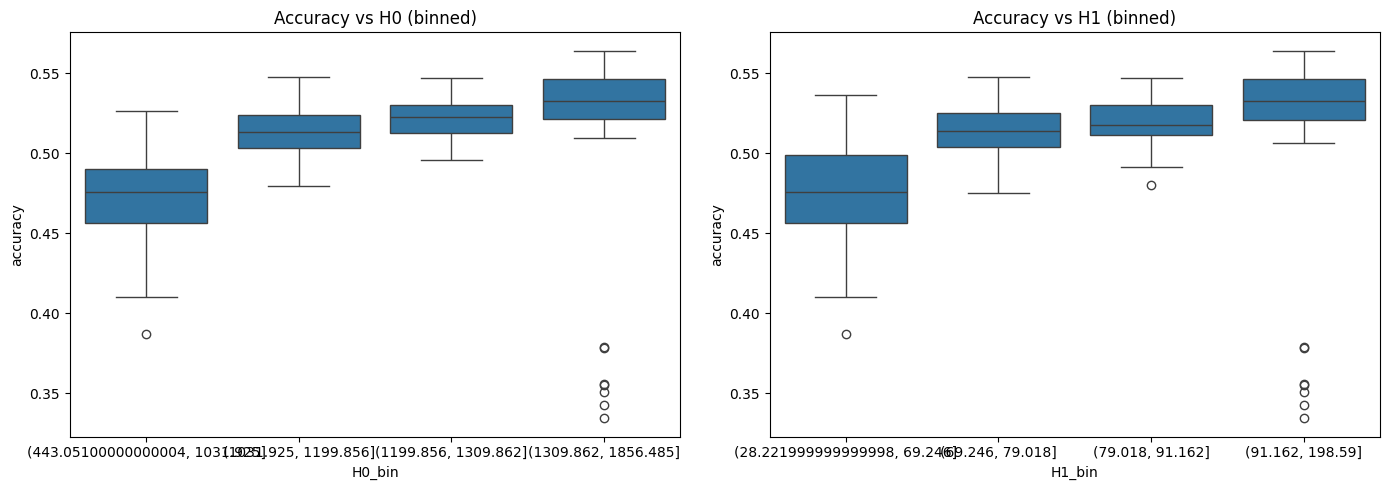

In [7]:
df["H0_bin"] = pd.qcut(df["metric_ripser_sum_H0"], q=4)
df["H1_bin"] = pd.qcut(df["metric_ripser_sum_H1"], q=4)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(x="H0_bin", y="accuracy", data=df, ax=axes[0])
axes[0].set_title("Accuracy vs H0 (binned)")

sns.boxplot(x="H1_bin", y="accuracy", data=df, ax=axes[1])
axes[1].set_title("Accuracy vs H1 (binned)")

plt.tight_layout()
plt.show()


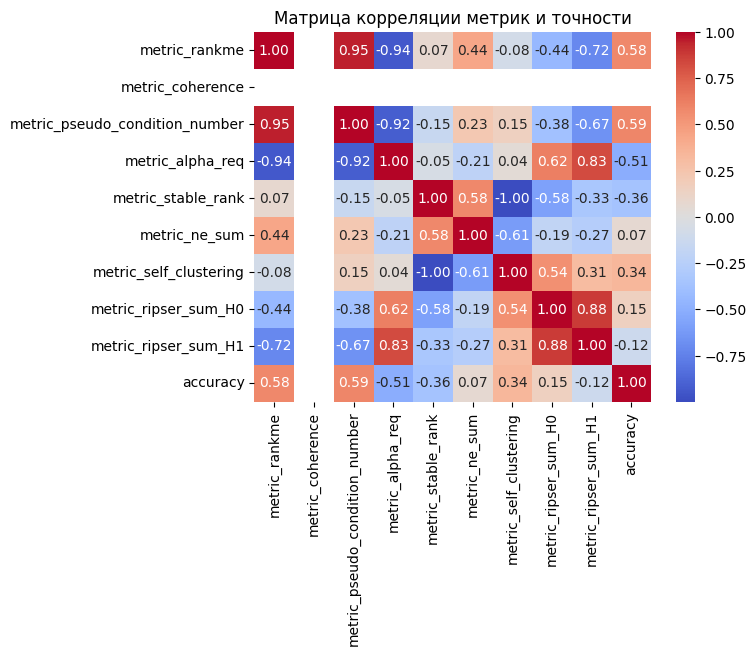

In [ ]:
cols = [c for c in df.columns if c.startswith("metric_")] + ["accuracy"]
corr = df[cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матрица корреляции метрик и точности")
plt.show()